In [54]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\Windows\Fonts\\YTTE08.TTF' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties (fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용

plt.rc('axes', unicode_minus=False)

<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:5: SyntaxWarning: invalid escape sequence '\W'
C:\Users\TJ\AppData\Local\Temp\ipykernel_8444\972888335.py:5: SyntaxWarning: invalid escape sequence '\W'
  font_path = 'C:\Windows\Fonts\\YTTE08.TTF' # 윈도우 OS 폰트 경로


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
shopping_df = pd.read_csv('data/shopping_behavior_updated.csv')
display(shopping_df.head())
display(shopping_df.info())

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

None

In [58]:
max_age = shopping_df['Age'].max()
shopping_df['AgeGroup'] = pd.cut(shopping_df['Age'],
       bins = [18, 35, 50, 65, max_age],
       labels=['18~34', '35~49', '50~64', '65~'],
       right=False)

shopping_df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,AgeGroup
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,50~64
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18~34
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50~64
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18~34
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,35~49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,35~49
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,50~64
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,35~49
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,35~49


<h3> 분석 목록 </h3>

    1. 미국 지역별 온라인 판매 현황
        1.1 지역별 총매출 기여도
        1.2 지역별 1회 구매당 지출액 분포

    2. 서부지역 구매력과 가격 전략 분석

        2.1 구매력 Gender, Age, Category

        2.2 가격탄력성 Discount Applied, Promo Code Used

        2.3 리뷰와 매출 관계 Review Rating, Purchase Amount

    3. 서부지역 지역/계절별 트렌드 분석

        3.1 지역별 구매 Location, Category

        3.2 계절별 칼러 및 상품 선호도 Season, Item Purchased, Color

    4. 서부지역 고객 충성도 및 재구매 분석

        4.1 구독영향 Subscription Status, Frequency of Purchases

        4.2 충성도높은고객 Previous Purchase, Frequency of Purchases

    5. 서부지역 물류 및 결제 효율 분석

        5.1 배송 선호도 Shipping Type

        5.2 결제 수단 선호도 Payment 
        
    6. 시장 세분화 (Alaska, Arizona, Nevada)

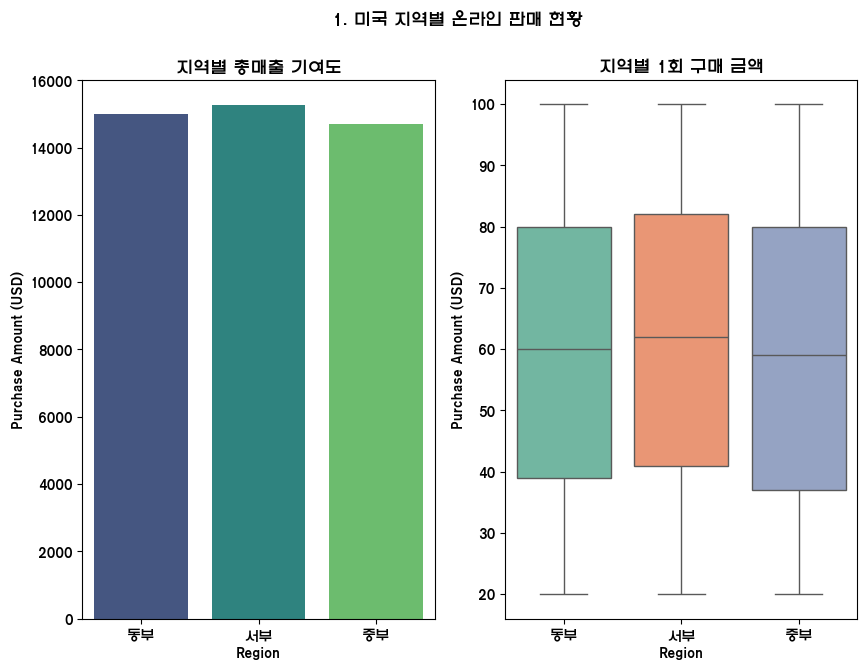

In [27]:
# 지역별 판매 현황

fig, ax = plt.subplots(1, 2, figsize=(10, 7))

def location_separate(location):
    
    EAST_STATES = ('Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia')
    CENTRAL_STATES = ('Arkansas', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Texas', 'Wisconsin')
        
    if location in EAST_STATES :
            return '동부'
    elif location in CENTRAL_STATES :
            return '중부'
    else:
            return '서부'    

if 'Region' not in shopping_df.columns:
    shopping_df['Region'] = shopping_df['Location'].apply(location_separate)

    sampled_shopping_df = (
        shopping_df.groupby('Region', group_keys=False)
        .apply(lambda x: x.sample(n=1000, random_state=42))
    )

location_total_df = sampled_shopping_df.groupby(['Season', 'Region'])['Purchase Amount (USD)'].sum().reset_index()

sns.barplot(data=location_total_df, 
            x='Region',
            y='Purchase Amount (USD)',     
            hue='Region',
            palette='viridis',
            errorbar=None,
            ax=ax[0]
            )

sns.boxplot(data=sampled_shopping_df, 
            x='Region',
            y='Purchase Amount (USD)',
            hue='Region',
            palette='Set2',            
            ax=ax[1]
            )

ax[0].set_title('지역별 총매출 기여도')
ax[1].set_title('지역별 1회 구매 금액')

plt.suptitle('1. 미국 지역별 온라인 판매 현황')


plt.show()

C:\Users\TJ\AppData\Local\Temp\ipykernel_8444\2197716847.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_total_df = west_shopping_df.groupby(['Gender', 'AgeGroup', 'Category', 'Discount Applied', 'Promo Code Used', 'Review Rating', 'Location'])['Purchase Amount (USD)'].sum().reset_index()


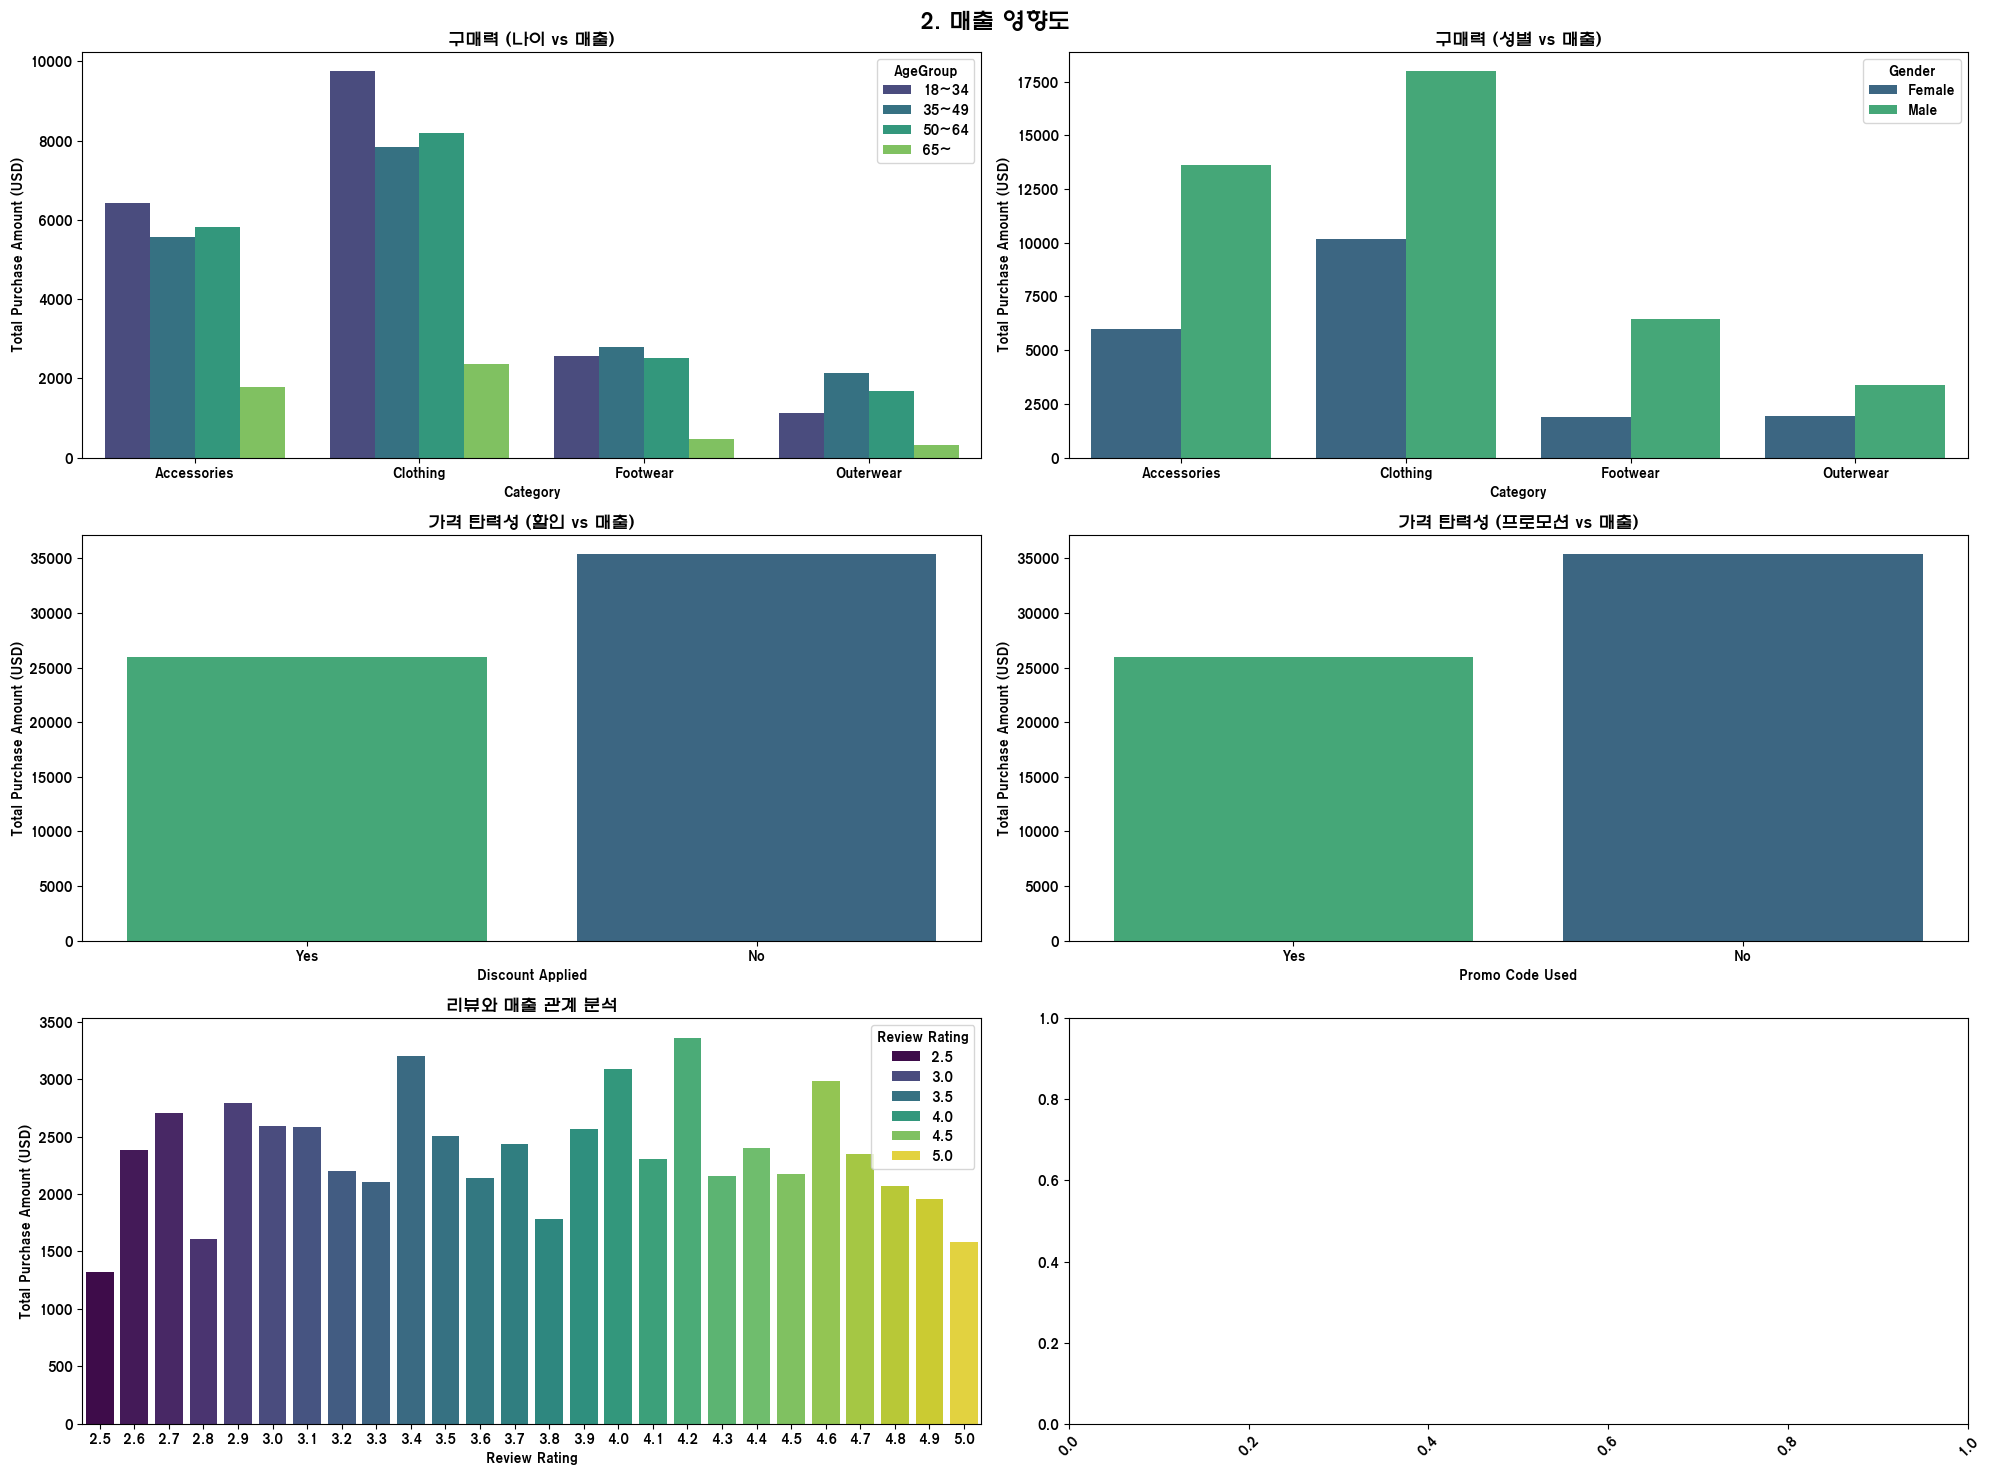

In [ ]:
# 2. 구매력과 가격 전략 분석

fig, ax = plt.subplots(3, 2, figsize=(20, 15))

west_shopping_df = shopping_df[shopping_df['Region']=='서부']

#     구매력 Gender, Age, Category ----------------------

gender_age_total_df = west_shopping_df.groupby(['Gender', 'AgeGroup', 'Category', 'Discount Applied', 'Promo Code Used', 'Review Rating', 'Location'])['Purchase Amount (USD)'].sum().reset_index()
gender_age_total_df.columns = ['Gender', 'AgeGroup', 'Category', 'Discount Applied', 'Promo Code Used', 'Review Rating', 'Location', 'Total Purchase Amount (USD)']

sns.barplot(data=gender_age_total_df,
            x='Category',
            y='Total Purchase Amount (USD)',
            hue='AgeGroup',
            estimator='sum',
            palette='viridis',
            errorbar=None,
            ax=ax[0, 0]            
            )

sns.barplot(data=gender_age_total_df,
            x='Category',
            y='Total Purchase Amount (USD)',
            hue='Gender',
            estimator='sum',
            palette='viridis',
            errorbar=None,
            ax=ax[0, 1]            
            )

#     가격탄력성 Discount Applied, Promo Code Used ----------

orderYN = ['Yes', 'No']

sns.barplot(data=gender_age_total_df,
            x='Discount Applied',
            y='Total Purchase Amount (USD)',            
            hue='Discount Applied',
            estimator='sum',
            palette='viridis',
            errorbar=None,
            order=orderYN,
            ax=ax[1, 0]           
            )

sns.barplot(data=gender_age_total_df,
            x='Promo Code Used',
            y='Total Purchase Amount (USD)',            
            hue='Promo Code Used',
            estimator='sum',
            palette='viridis',
            errorbar=None,
            order=orderYN,
            ax=ax[1, 1]            
            )

#     리뷰와 매출 관계 Review Rating, Purchase Amount ----------

sns.barplot(data=gender_age_total_df,
            x='Review Rating',
            y='Total Purchase Amount (USD)',            
            hue='Review Rating',
            estimator='sum',
            palette='viridis',
            errorbar=None,
            ax=ax[2, 0]            
            )


ax[2, 1].tick_params(axis='x', rotation=45)

plt.suptitle("2. 구매력과 가격 전략 분석", fontsize=16, fontweight='bold')

# 2. 구매력과 가격 전략 분석
ax[0, 0].set_title('구매력 (나이 vs 매출)')
ax[0, 1].set_title('구매력 (성별 vs 매출)')
ax[1, 0].set_title('가격 탄력성 (할인 vs 매출)')
ax[1, 1].set_title('가격 탄력성 (프로모션 vs 매출)')
ax[2, 0].set_title('리뷰와 매출 관계 분석')

plt.tight_layout() 

plt.show()

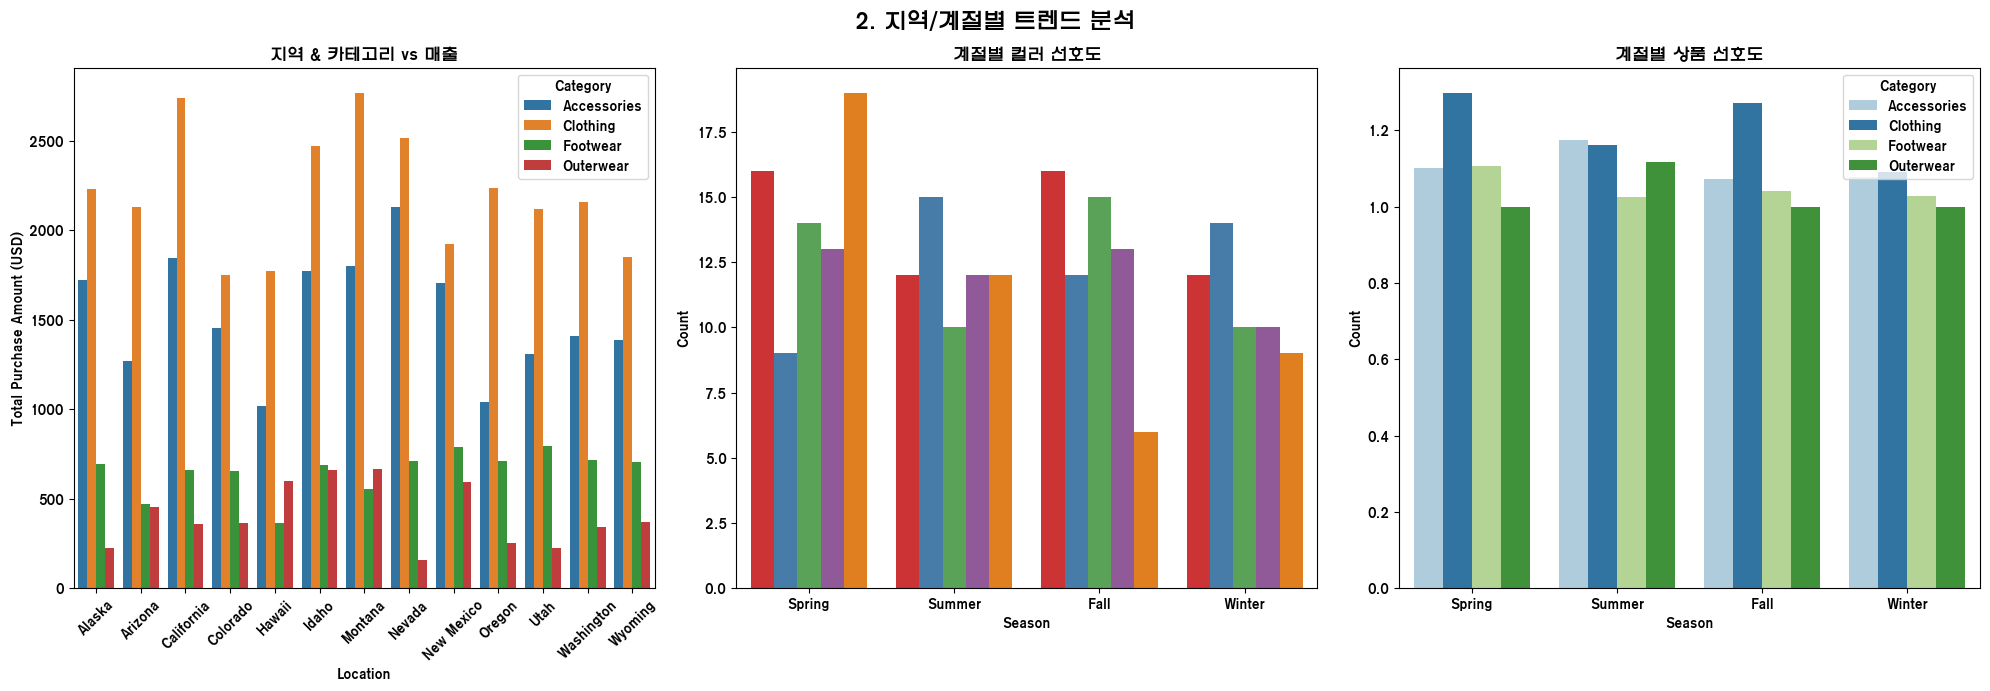

In [41]:
# 3. 지역/계절별 트렌드 분석

#     지역별 구매 Location, Category ----------

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

def location_separate(location):
    
    EAST_STATES = ('Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia')
    CENTRAL_STATES = ('Arkansas', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Texas', 'Wisconsin')
        
    if location in EAST_STATES :
            return '동부'
    elif location in CENTRAL_STATES :
            return '중부'
    else:
            return '서부'    

    # 동부 (East)	Alabama, Connecticut, Delaware, Florida, Georgia, Kentucky, Maine, Maryland, Massachusetts, Mississippi, New Hampshire, New Jersey, New York, North Carolina, Pennsylvania, Rhode Island, South Carolina, Tennessee, Vermont, Virginia, West Virginia
    # 중부 (Central)	Arkansas, Illinois, Indiana, Iowa, Kansas, Louisiana, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, Oklahoma, South Dakota, Texas, Wisconsin
    # 서부 (West)	Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming

shopping_df['Region'] = shopping_df['Location'].apply(location_separate)

west_df = shopping_df[shopping_df['Region']=='서부'].copy()

west_total_df = west_df.groupby(['Location', 'Category'])['Purchase Amount (USD)'].sum().reset_index()
west_total_df.columns = ['Location', 'Category', 'Total Purchase Amount (USD)']

sns.barplot(data=west_total_df,
            x='Location',
            y='Total Purchase Amount (USD)',   
            hue='Category',         
            estimator='mean',
            palette='tab10',
            errorbar=None,
            ax=ax[0]               
            ) 

#     계절별 칼러 및 상품 선호도 Season, Item Purchased, Color

top_5_colors = west_df['Color'].value_counts().nlargest(5).index
filtered_west_df = west_df[west_df['Color'].isin(top_5_colors)]
season_total_df = filtered_west_df.groupby(['Season', 'Color'])['Item Purchased'].count().reset_index(name='Count')

order = ['Spring', 'Summer', 'Fall', 'Winter']

sns.barplot(data=season_total_df,
            x='Season',
            y='Count', 
            hue='Color',
            order=order,
            palette='Set1',
            errorbar=None,            
            ax=ax[1]            
            )

product_total_df = west_df.groupby(['Season', 'Color', 'Category', 'Subscription Status', 'Frequency of Purchases'])['Item Purchased'].count().reset_index()
product_total_df.columns = ['Season', 'Color', 'Category', 'Subscription Status', 'Frequency of Purchases', 'Count']

sns.barplot(data=product_total_df,
            x='Season',
            y='Count', 
            hue='Category',
            order=order,
            palette='Paired',
            errorbar=None,
            ax=ax[2]            
            )

plt.suptitle("2. 지역/계절별 트렌드 분석", fontsize=16, fontweight='bold')

ax[0].tick_params(axis='x', rotation=45)
ax[1].legend().set_visible(False)

# 3. 지역/계절별 트렌드 분석
ax[0].set_title('지역 & 카테고리 vs 매출')
ax[1].set_title('계절별 컬러 선호도')
ax[2].set_title('계절별 상품 선호도')

plt.tight_layout() 

plt.show()

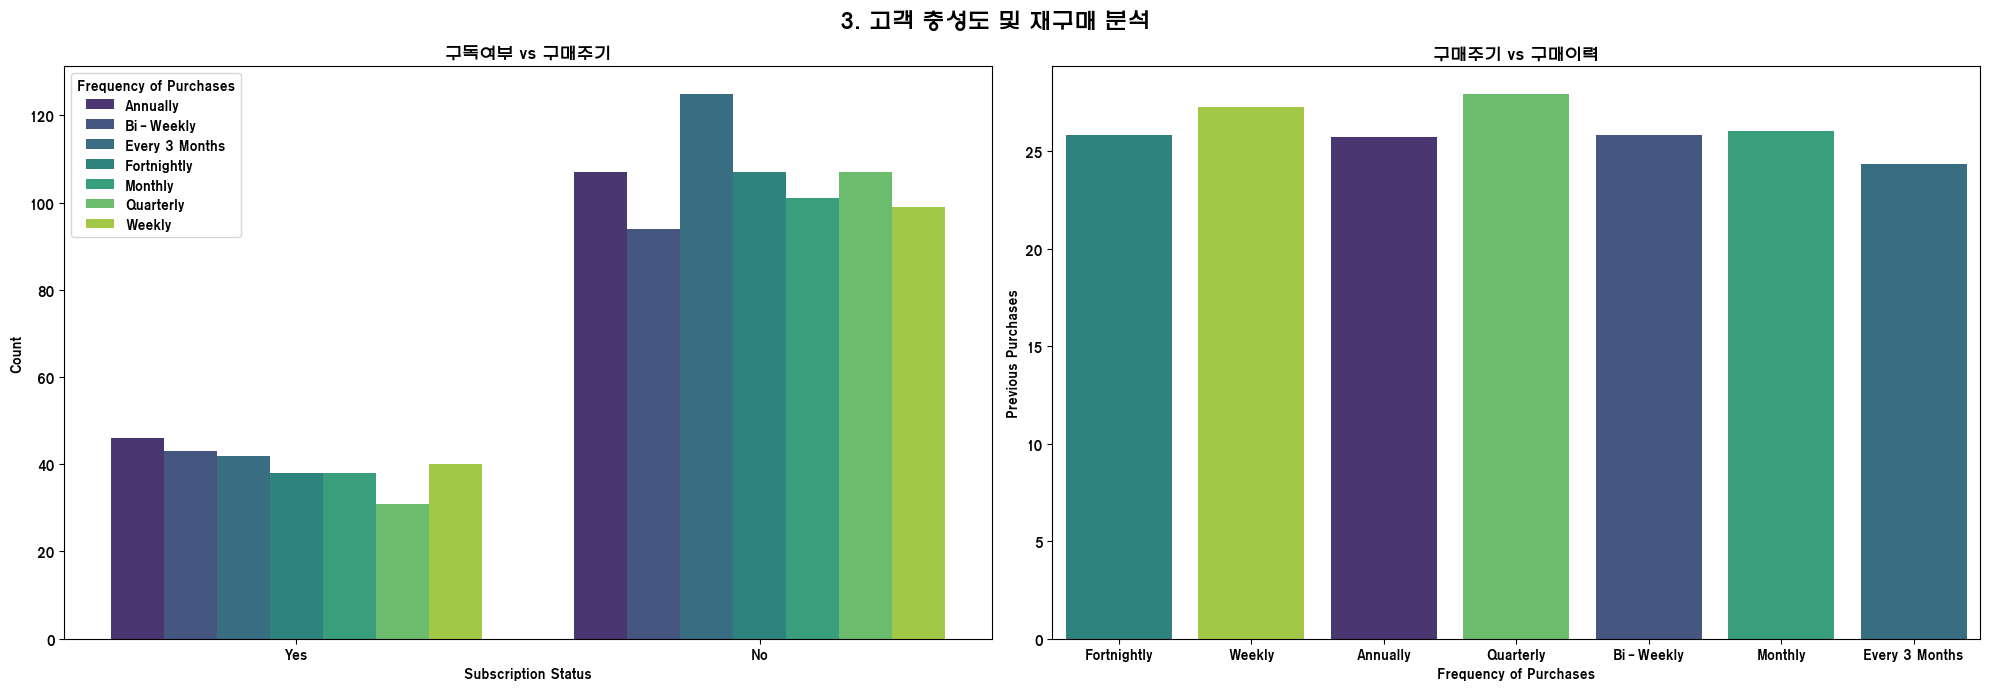

In [ ]:
# 4. 고객 충성도 및 재구매 분석 
#     구독영향 Subscription Status, Frequency of Purchases

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

subscription_df = west_shopping_df.groupby(['Subscription Status', 'Frequency of Purchases'])['Item Purchased'].count().reset_index()
subscription_df.columns = ['Subscription Status', 'Frequency of Purchases', 'Count']

sns.barplot(data=subscription_df,
            x='Subscription Status',
            y='Count', 
            hue='Frequency of Purchases',
            palette='viridis',
            errorbar=None,
            order=orderYN,
            ax=ax[0],                     
            )

#     충성도높은고객 Previous Purchase, Frequency of Purchases

loyalty_df = west_shopping_df.groupby(['Frequency of Purchases'])['Previous Purchases'].mean().reset_index()

freq_order = ['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly', 'Monthly', 'Every 3 Months']

sns.barplot(data=loyalty_df,
            x='Frequency of Purchases',
            y='Previous Purchases',  
            hue='Frequency of Purchases',
            ax=ax[1],
            palette='viridis',
            errorbar=None,
            order=freq_order
            )

plt.suptitle("3. 고객 충성도 및 재구매 분석", fontsize=16, fontweight='bold')

# 4. 고객 충성도 및 재구매 분석
ax[0].set_title('구독여부 vs 구매주기')
ax[1].set_title('구매주기 vs 구매이력')

plt.tight_layout() 

plt.show()

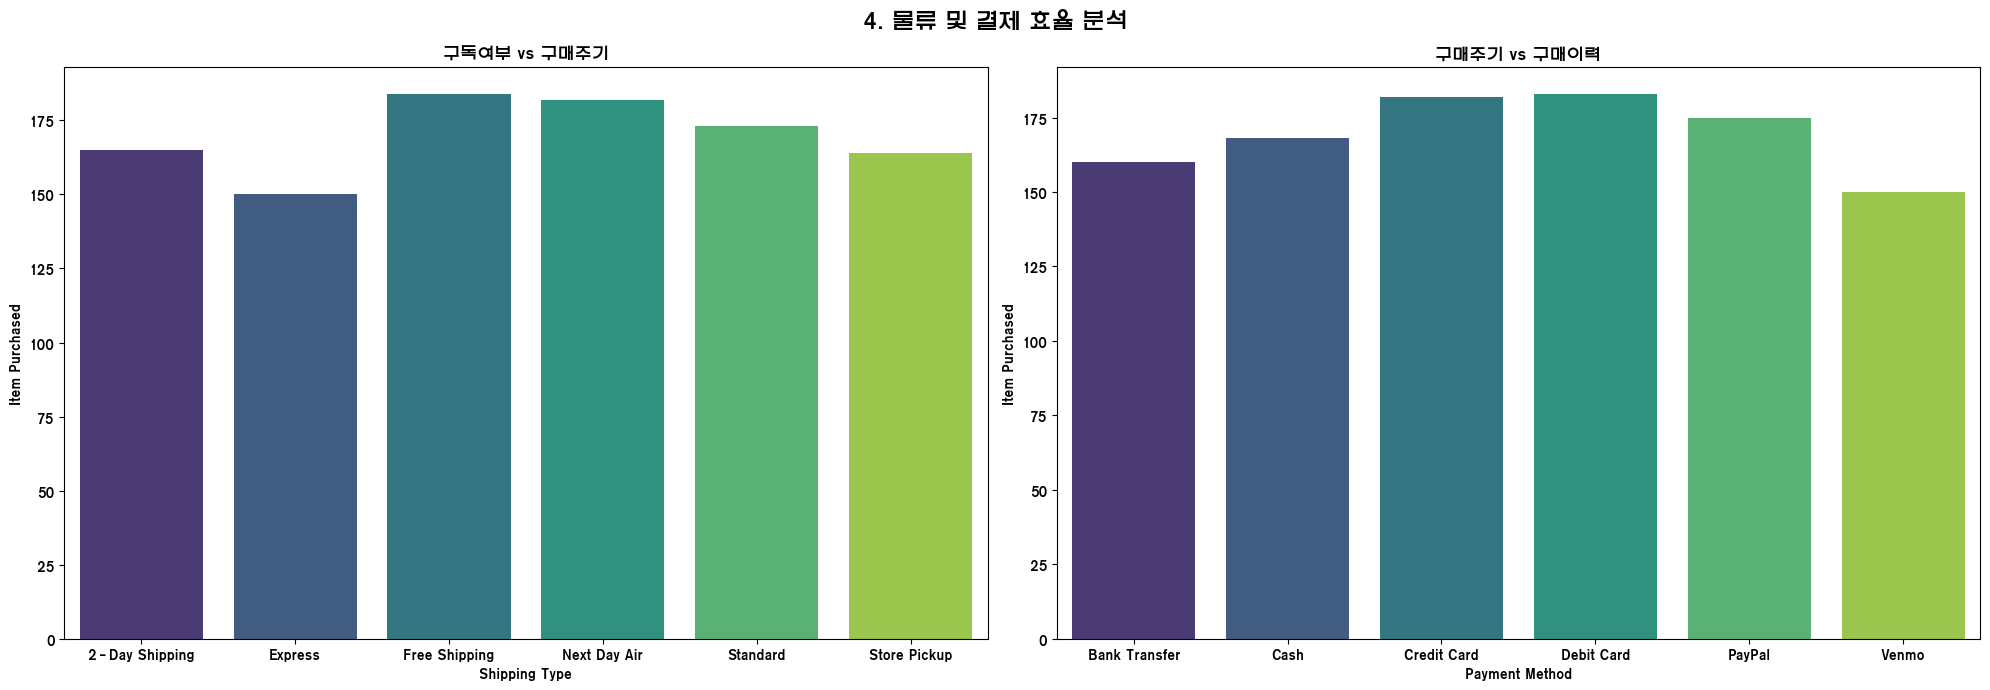

In [ ]:

# 5. 물류 및 결제 효율성 분석 
#     배송 선호도 Shipping Type

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

shipping_pref_df = west_df.groupby(['Shipping Type'])['Item Purchased'].count().reset_index()

sns.barplot(data=shipping_pref_df,
            x='Shipping Type',
            y='Item Purchased',
            hue='Shipping Type',
            palette='viridis',            
            errorbar=None,
            ax=ax[0]            
            )

#     결제 수단 선호도 Payment Method
payment_pref_df = west_df.groupby(['Payment Method'])['Item Purchased'].count().reset_index()

sns.barplot(data=payment_pref_df,
            x='Payment Method',
            y='Item Purchased',
            hue='Payment Method',
            palette='viridis',            
            errorbar=None,
            ax=ax[1]            
            )

plt.suptitle("4. 물류 및 결제 효율 분석", fontsize=16, fontweight='bold')

# 4. 물류 및 결제 효율성 분석
ax[0].set_title('구독여부 vs 구매주기')
ax[1].set_title('구매주기 vs 구매이력')

plt.tight_layout() 

plt.show()

C:\Users\TJ\AppData\Local\Temp\ipykernel_8444\3024712459.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=65, random_state=42) if len(x) >= 65 else x)


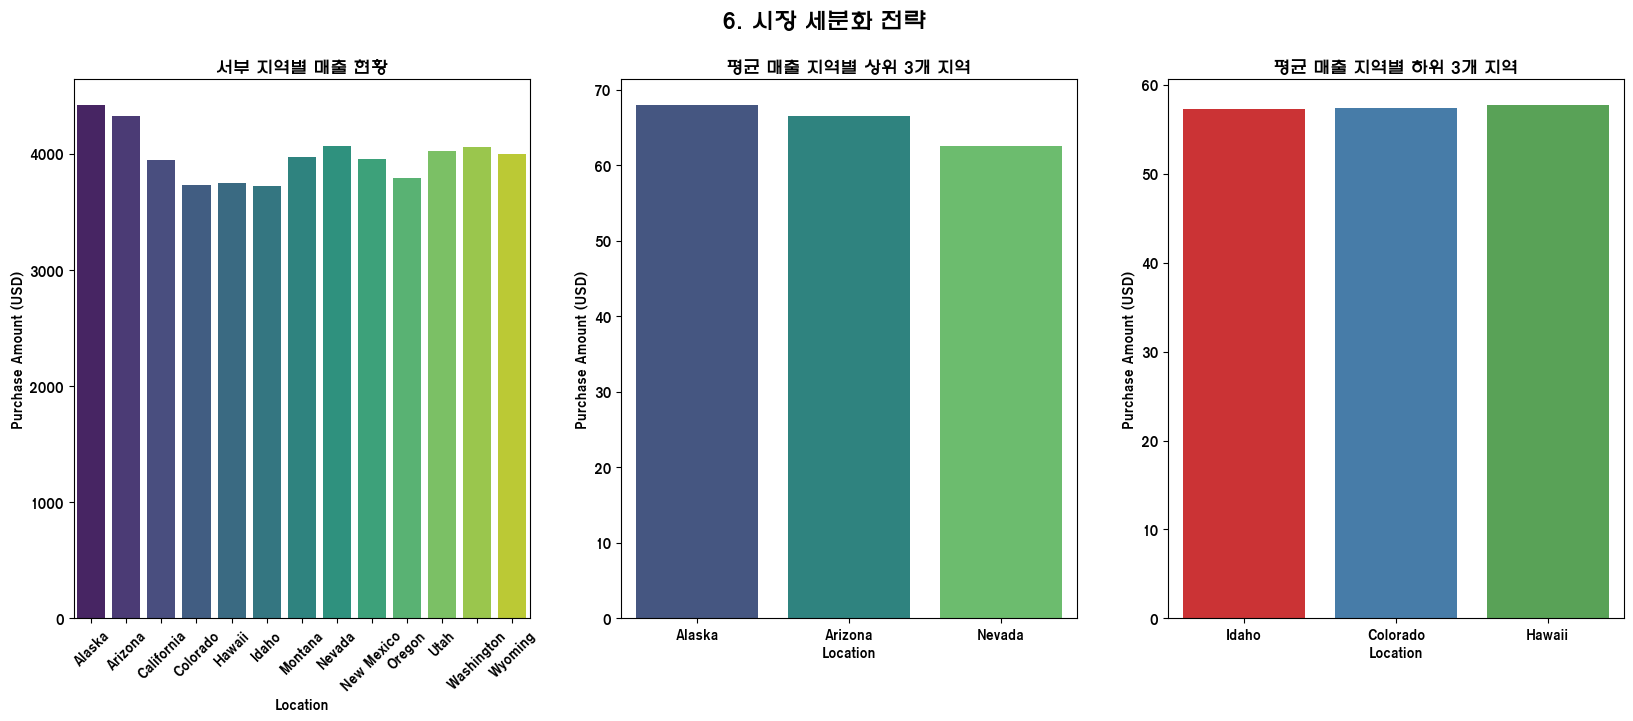

In [67]:
# 6. 시장 세분화 전략 (Alaska, Arizona, Nevada)

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sampled_westshopping_df = (
    west_shopping_df.groupby('Location', group_keys=False)
    .apply(lambda x: x.sample(n=65, random_state=42) if len(x) >= 65 else x)
)

total_westsales_df = sampled_westshopping_df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()

sns.barplot(data=total_westsales_df,
            x='Location',
            y='Purchase Amount (USD)',
            hue='Location',
            palette='viridis',
            ax=ax[0]             
            )

total_lar_westsales_df = sampled_westshopping_df.groupby('Location')['Purchase Amount (USD)'].mean().nlargest(3).reset_index()
total_sma_westsales_df = sampled_westshopping_df.groupby('Location')['Purchase Amount (USD)'].mean().nsmallest(3).reset_index()

sns.barplot(data=total_lar_westsales_df,
            x='Location',
            y='Purchase Amount (USD)',
            hue='Location',
            ax=ax[1],
            palette='viridis'             
            )

sns.barplot(data=total_sma_westsales_df,
            x='Location',
            y='Purchase Amount (USD)',
            hue='Location',
            ax=ax[2],
            palette='Set1'             
            )

plt.suptitle("6. 시장 세분화 전략", fontsize=16, fontweight='bold')

ax[0].tick_params(axis='x', rotation=45)

# 4. 물류 및 결제 효율성 분석
ax[0].set_title('서부 지역별 매출 현황')
ax[1].set_title('평균 매출 지역별 상위 3개 지역')
ax[2].set_title('평균 매출 지역별 하위 3개 지역')

plt.show()

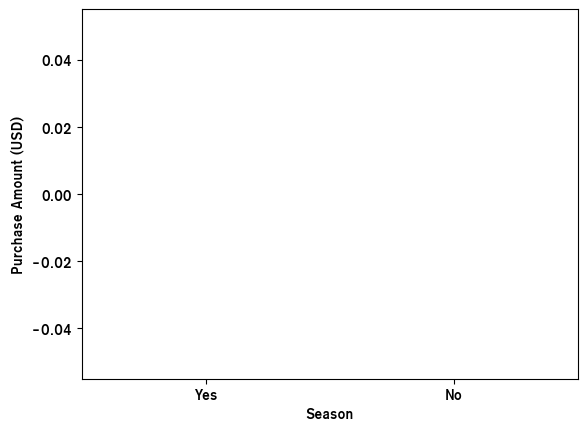

In [82]:
# 계절별 컬러별 판매 현황
target_locations = ['Alaska', 'Arizona', 'Nevada']
top_3sales_df = west_shopping_df[west_shopping_df['Location'].isin(target_locations)]

season_color_sales_df = top_3sales_df.groupby(['Season', 'Color'])['Purchase Amount (USD)'].sum().reset_index()

sns.barplot(data=season_color_sales_df,
               x='Season',
               y='Purchase Amount (USD)',
               hue= 'Color',
               palette='Set1',
               order=orderYN,
               errorbar=None    
)

plt.legend().set_visible(False)
plt.show()